# PROJECT
## Applications of Big Data

### 0. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

### 2. Data Understanding

#### 2.1. Tổng quan kích thước và kiểu dữ liệu trong từng cột

In [2]:
df = pd.read_csv('dataset/data_clean.csv')
df.head()

,Job Id,Qualifications,location,Country,Work Type,Company Size,Job Posting Date,Preference,Job Title,Role,...,Job Description,Benefits,skills,Responsibilities,Company,Salary_avg,Experience_avg,Day,Month,Year
0,1089843540111562,M.Tech,Douglas,Isle of Man,Intern,26801,2022-04-24,Female,Digital Marketing Specialist,Social Media Manager,...,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,79.0,10.0,24,4,2022
1,398454096642776,BCA,Ashgabat,Turkmenistan,Intern,100340,2022-12-19,Female,Web Developer,Frontend Web Developer,...,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,86.0,7.0,19,12,2022
2,481640072963533,PhD,Macao,"Macao SAR, China",Temporary,84525,2022-09-14,Male,Operations Manager,Quality Control Manager,...,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,82.5,6.0,14,9,2022
3,688192671473044,PhD,Porto-Novo,Benin,Full-Time,129896,2023-02-25,Female,Network Engineer,Wireless Network Engineer,...,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,78.0,7.5,25,2,2023
4,117057806156508,MBA,Santiago,Chile,Intern,53944,2022-10-11,Female,Event Manager,Conference Manager,...,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,75.5,6.5,11,10,2022


In [3]:
df.shape

(1615940, 21)

Dữ liệu có 1,615,940 dòng và 23 cột. Và dữ liệu được thu thập từ ngày `15/09/2021` đến ngày `15/09/2023`.

Ý nghĩa của một số cột như sau (Tương tự như ở phần `Data Processing`):

- Qualifications: Trình độ học vấn
- Experience_avg: Kinh nghiệm
- Salary_avg_: Mức lương
- Job Postinging Date: Ngày đăng tuyển dụng
- Company Size: Quy mô công ty
- Role: Vị trí công việc

Ngoài ra còn có các cột khác như: Job Title, Country, location, Contact Person, Contact, Company Profile, Industry,... được mô tả ở `Data_description.txt`. 

In [4]:
print(df.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Qualifications    1615940 non-null  object 
 2   location          1615940 non-null  object 
 3   Country           1615940 non-null  object 
 4   Work Type         1615940 non-null  object 
 5   Company Size      1615940 non-null  int64  
 6   Job Posting Date  1615940 non-null  object 
 7   Preference        1615940 non-null  object 
 8   Job Title         1615940 non-null  object 
 9   Role              1615940 non-null  object 
 10  Job Portal        1615940 non-null  object 
 11  Job Description   1615940 non-null  object 
 12  Benefits          1615940 non-null  object 
 13  skills            1615940 non-null  object 
 14  Responsibilities  1615940 non-null  object 
 15  Company           1615940 non-null  object 
 16  

Dữ liệu của các cột:

- Job ID, Experience_avg, Salary_avg, Company Size: là kiểu numerical.
- Cột Job Posting Date: là kiểu datetime và các cột Day, Month, Year là kiểu numerical được trích từ cột Job Posting Date.
- Còn lại là kiểu categorical.


In [5]:
df['Year'].value_counts()

2022    806158
2023    570838
2021    238944
Name: Year, dtype: int64

Qua đó ta thấy dữ liệu được thu thập trong 3 năm từ 2021 đến 2023.

In [6]:
df1 = df['Country'].unique()
df1 = pd.DataFrame(df1)
df1.sort_values(by=0, inplace=True)
df1

,0
58,Afghanistan
210,Albania
205,Algeria
131,American Samoa
158,Andorra
...,...
38,Virgin Islands (U.S.)
34,West Bank and Gaza
15,Yemen
100,Zambia


Ở đây ta thấy có 216 quốc gia và khi nhóm tìm hiểu thì tính tới 2023 theo LHQ thì trên thới giới chỉ có 204 nước và lãnh thổ(`sputniknews.vn`). Tuy nhiên qua kiểm tra thì không có quốc gia nào trùng nhau và có một số quốc gia có quốc kỳ tuy nhiên vẫn thuộc một quốc gia khác. Ví dụ `Virgin Islands (U.S.)`, `Bahamas`,... đều thuộc Hoa Kỳ nên ở đây nhóm sẽ giữ nguyên. Vì ở đây có thể là do đã tính luôn cả các vùng, các quốc gia tự trị hoặc lãnh thổ đặc biệt là các `quốc gia` riêng biệt.

In [7]:
df['Country'].value_counts()

Malta            7723
Venezuela, RB    7694
Somalia          7689
Sierra Leone     7656
Vietnam          7649
                 ... 
Ghana            7312
Ukraine          7307
Iceland          7292
Uganda           7290
Lithuania        7273
Name: Country, Length: 216, dtype: int64

Qua dữ liệu thì nhu cầu tuyển dụng của các quốc gia trên thế giới trong 3 năm 2021-2023 đều vượt qua 7200 công việc, trong đó `Việt Nam` nằm  trong top 5 quốc gia có như cầu tuyển dụng cao nhất thế giới. do đó ta có thể thấy nhu cầu tuyển dụng của `Việt Nam` là rất cao.

In [8]:
df[['location', 'Country']].nunique()

location    214
Country     216
dtype: int64

Sau khi tìm hiểu thì theo dữ leieuj `Seoul` thì nó nằm ở `Korea, Rep.` và `North Korea` và `Apia` là thủ đô cũng như thành phố lớn nhất tại `Samoa` nhưng theo dữ liệu thì nó thêm cả `American Samoa`. Vì vậy nhóm sẽ giữ nguyên.

#### 2.2. Phân bố dữ liệu theo từng cột 

##### 2.2.1. Phân bố dữ liệu theo cột`Experience_avg`

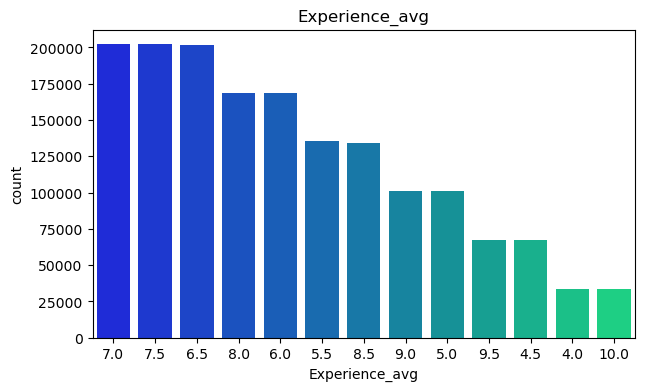

In [9]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Experience_avg', data=df, palette='winter', order=df['Experience_avg'].value_counts().index)
plt.title('Experience_avg');

Qua biểu đồ ta có thể thấy được phân bố dự liệu ở cột `Experience_avg` là:

- Người có kinh nghiệm 7.0, 7.5, 6.5 năm có tỷ lệ được tuyển dụng cao nhất. Kinh nghiệm 8.0, 6.0, 5.5, 8.5 cũng khá phổ biến và có khả năng được tuyển dụng khá cao chỉ sau 7.0, 7.5, 6.5 năm. Kinh nghiệm 9.0, 5.0, 9.5, 4.5 cũng có tỷ lệ tuyển dụng cao tuy nhiên không bằng các kinh nghiệm trên. Dưới 4.0 năm kinh nghiệm thì tỷ lệ được tuyển dụng thấp.

##### 2.2.2. Phân bố dữ liệu theo cột `Qualifications`

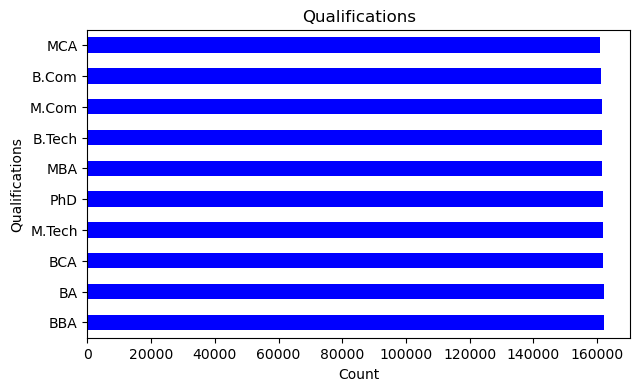

In [10]:
qualification = df['Qualifications'].value_counts().head(10)
qualification.plot(kind='barh', figsize=(7, 4), color='blue')
plt.title('Qualifications')
plt.ylabel('Qualifications')
plt.xlabel('Count');

Các cơ hội tuyển dụng của các bằng cấp khác nhau gần như là bằng như ở 10 loại bằng cấp có trong dữ liệu. Trong dó, `BBA: Cử nhân quản trị kinh doanh` là cao nhất còn `MCA: Thạc sĩ Ứng dụng Máy tính` là thấp nhất tuy nhiên cũng không chênh lệch nhiều.

##### 2.2.3. Phân bố dữ liệu theo cột `Work Type`

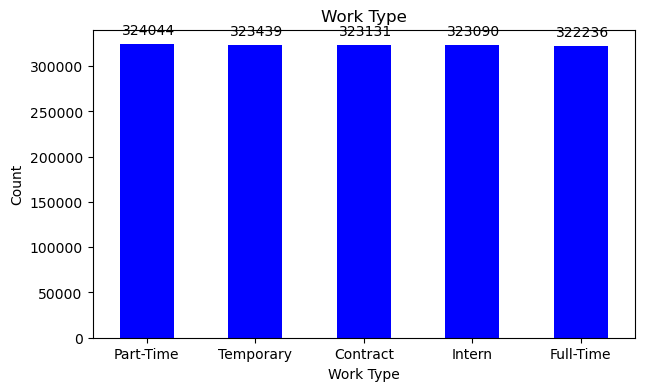

In [11]:
work_type = df['Work Type'].value_counts().head()

plt.figure(figsize=(7, 4))
ax = work_type.plot(kind='bar', color='blue')
plt.title('Work Type')
plt.ylabel('Count')
plt.xlabel('Work Type')
plt.xticks(rotation=0)

for p, value in zip(ax.patches, work_type.values):
    ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(1, 10), textcoords='offset points')

plt.show();

Cơ bản các loại công việc điều có nhu cầu tương đối nhau. Trong đó, nhu cầu tuyển dụng `Part-time` là cao nhất, tiếp theo là `Temporary`, `Contract`, `Intern` và cuối cùng thấp nhất là `Full-time`. 

##### 2.2.4. Phân bố dữ liệu theo cột `Job Posting Date`

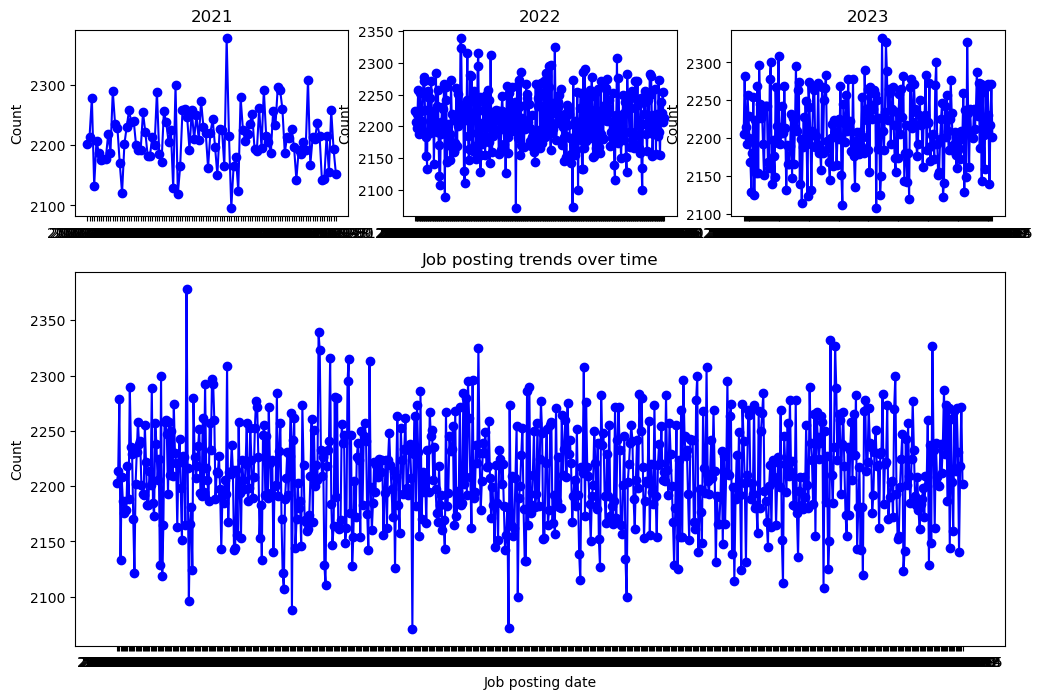

In [12]:
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 3, height_ratios=[2, 4], hspace=0.2)

job_posting_2021 = df[df['Year'] == 2021]['Job Posting Date'].value_counts().sort_index()
job_posting_2022 = df[df['Year'] == 2022]['Job Posting Date'].value_counts().sort_index()
job_posting_2023 = df[df['Year'] == 2023]['Job Posting Date'].value_counts().sort_index()

ax1 = plt.subplot(gs[0, 0])
ax1.plot(job_posting_2021.index, job_posting_2021.values, marker='o', linestyle='-', color='b')
ax1.set_title('2021')
ax1.set_ylabel('Count')

ax2 = plt.subplot(gs[0, 1])
ax2.plot(job_posting_2022.index, job_posting_2022.values, marker='o', linestyle='-', color='b')
ax2.set_title('2022')
ax2.set_ylabel('Count')

ax3 = plt.subplot(gs[0, 2])
ax3.plot(job_posting_2023.index, job_posting_2023.values, marker='o', linestyle='-', color='b')
ax3.set_title('2023')
ax3.set_ylabel('Count')

ax4 = plt.subplot(gs[1, :])
job_posting_counts = df['Job Posting Date'].value_counts().sort_index()
plt.plot(job_posting_counts.index, job_posting_counts.values, marker='o', linestyle='-', color='b')
plt.title('Job posting trends over time')
plt.xlabel('Job posting date')
plt.ylabel('Count')

plt.show();

In [13]:
print('2021: ', job_posting_2021.mean())
print('2022: ', job_posting_2022.mean())
print('2023: ', job_posting_2023.mean())

2021:  2212.4444444444443
2022:  2208.6520547945206
2023:  2212.5503875968993


Dựa theo năm thì vào năm 2021 (kể từ ngày 15/09/2021) dao động khá lớn có thể là do dữ liệu chưa đầy đủ hoặc do tình hình dịch bệnh. Năm 2022 dao động cũng khá lớn còn năm 2023 thì dao động nhỏ hơn. Tuy nhiên, năm 2023 thì dữ liệu chưa đầy đủ (đến ngày 15/09/2023) nên có thể không chính xác và trung bình của dữ liệu năm 2023 theo như dữ liệu thì là cao nhất trong cả 3 năm.